<a href="https://colab.research.google.com/github/dinesh-2k3/BharatInternTasks/blob/main/market_maven_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Step 1 : Load the Excel file
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Load the dataset
df = pd.read_excel('supermarket dataset.xlsx')

# Step 2: Convert Date and Create DateTime Column
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype(str)  # Convert Time to string format
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)

# Step 3: Handle Missing Values
df.fillna(0, inplace=True)

# Step 4: Encode Categorical Variables (Exclude 'Product line', 'City', 'Branch')
label_encoders = {}
categorical_columns = ['Customer type', 'Gender', 'Payment']  # Exclude 'Product line', 'City', 'Branch'
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 5: Feature Engineering: Date-Time Features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Hour'] = df['DateTime'].dt.hour

# Step 6: Add Additional Columns
df['RevenuePerUnit'] = df['Unit price'] * df['Quantity']
df['TotalTaxAmount'] = df['Total'] * 0.05
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df.drop(columns=['DateTime'], inplace=True)

# Step 7: Log Transformation
df['LogQuantity'] = np.log1p(df['Quantity'])
df['LogTotal'] = np.log1p(df['Total'])
df['LogGrossIncome'] = np.log1p(df['gross income'])

# Step 8: Interaction Feature: Quantity * Unit Price
df['QuantityUnitPrice'] = df['Quantity'] * df['Unit price']

# Outlier Treatment for 'Total'
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Total'] >= Q1 - 1.5 * IQR) & (df['Total'] <= Q3 + 1.5 * IQR)]

# Step 9: Scaling Numerical Features (Exclude 'Product line', 'City', 'Branch')
numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 10: Save Preprocessed Data to Excel
df.to_excel('preprocessed_sales_data.xlsx', index=False)


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_excel('supermarket dataset.xlsx')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 1. Sales Distribution by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'supermarket dataset.xlsx'

In [ ]:
# 2. Sales Trends Over Time
sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Total'].sum()
sales_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()


NameError: name 'df' is not defined

In [ ]:
# 3. Branch/City-Wise Sales
branch_sales = df.groupby('Branch')['Total'].sum()
city_sales = df.groupby('City')['Total'].sum()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
branch_sales.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.subplot(1, 2, 2)
city_sales.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Total Sales by City')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.show()

NameError: name 'df' is not defined

In [ ]:
# 4. Quantity vs. Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', data=df, alpha=0.7)
plt.title('Quantity vs. Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 5. Payment Method Distribution
payment_counts = df['Payment'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

NameError: name 'df' is not defined

In [ ]:
# 6. Heatmap of Correlations
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'df' is not defined

In [ ]:
# Check column names
print(df.columns)
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Year',
       'Month', 'Day', 'DayOfWeek', 'Hour', 'RevenuePerUnit', 'TotalTaxAmount',
       'IsWeekend', 'LogQuantity', 'LogTotal', 'LogGrossIncome',
       'QuantityUnitPrice'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Step 1: Load Data
df = pd.read_excel('supermarket dataset.xlsx')

# Step 2: Clean column names by stripping any spaces or unwanted characters
df.columns = df.columns.str.strip()

# Step 3: Convert Date and Create DateTime Column
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype(str)  # Convert Time to string format
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)

# Step 4: Handle Missing Values
df.fillna(0, inplace=True)

# Step 5: Encode Categorical Variables (Exclude 'Product line', 'City', 'Branch')
label_encoders = {}
categorical_columns = ['Customer type', 'Gender', 'Payment']  # Exclude 'Product line', 'City', 'Branch'
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 6: Feature Engineering: Date-Time Features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Hour'] = df['DateTime'].dt.hour

# Step 7: Add Additional Columns
df['RevenuePerUnit'] = df['Unit price'] * df['Quantity']
df['TotalTaxAmount'] = df['Total'] * 0.05
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df.drop(columns=['DateTime'], inplace=True)

# Step 8: Log Transformation
df['LogQuantity'] = np.log1p(df['Quantity'])
df['LogTotal'] = np.log1p(df['Total'])
df['LogGrossIncome'] = np.log1p(df['gross income'])

# Step 9: Interaction Feature: Quantity * Unit Price
df['QuantityUnitPrice'] = df['Quantity'] * df['Unit price']

# Step 10: Outlier Treatment for 'Total'
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Total'] >= Q1 - 1.5 * IQR) & (df['Total'] <= Q3 + 1.5 * IQR)]

# Step 11: Scaling Numerical Features (Exclude 'Product line', 'City', 'Branch')
numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'gross income', 'Rating', 'RevenuePerUnit',
                      'TotalTaxAmount', 'LogQuantity', 'LogTotal', 'LogGrossIncome', 'QuantityUnitPrice',
                      'IsWeekend', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour']

# Ensure that all categorical columns have been encoded properly
df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')

# Step 12: Check for Non-Numeric Columns in X
X = df.drop(columns=['Total'])  # Features
y = df['Total']  # Target

# Check for any non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print(f"Non-numeric columns found in X: {non_numeric_columns}")
    # Handle these columns, e.g., encode or drop them.
    X = X.drop(columns=non_numeric_columns)  # Drop non-numeric columns for now

# Step 13: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 14: Scale the Data (Standardize)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 15: Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 16: Make Predictions
y_pred = rf_regressor.predict(X_test)

# Step 17: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Step 18: Save the Trained Model
joblib.dump(rf_regressor, 'random_forest_regressor.pkl')
print("Model saved as 'random_forest_regressor.pkl'")

# Step 19: Example: Load and Use the Saved Model
loaded_model = joblib.load('random_forest_regressor.pkl')
new_data = X_test.iloc[0:1]  # Example: Use the first row of the test set
new_prediction = loaded_model.predict(new_data)
print(f"Prediction for new data: {new_prediction}")


FileNotFoundError: [Errno 2] No such file or directory: 'supermarket dataset.xlsx'

**Hyperparameter tuning**

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mean Squared Error: 0.005476832259260189
R-squared: 0.9914401647229166


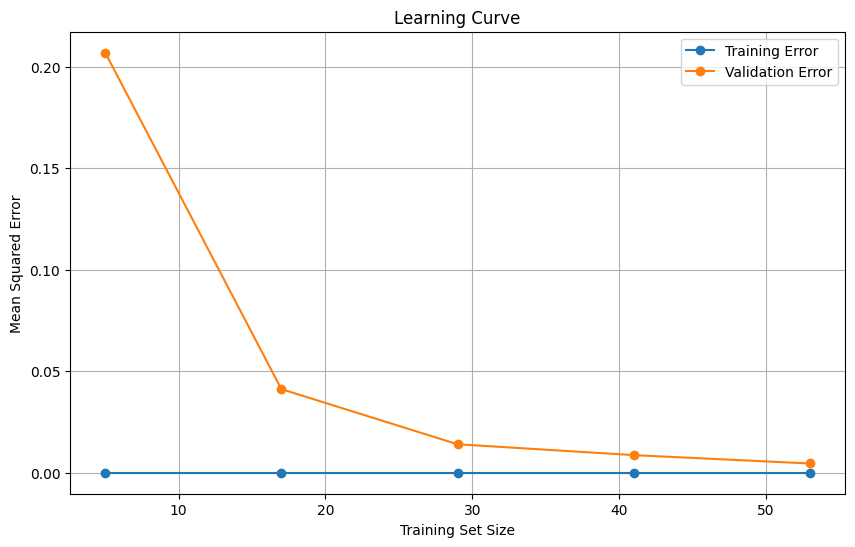

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load Data
df = pd.read_excel('supermarket dataset.xlsx')
df = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Step 2: Preprocess Data
df['Date'] = pd.to_datetime(df['Date'])
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.drop(columns=['Date', 'Time', 'Invoice ID'], inplace=True)

# Label Encoding
categorical_columns = ['Customer type', 'Gender', 'Payment', 'City', 'Branch', 'Product line']
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature Engineering
df['RevenuePerUnit'] = df['Unit price'] * df['Quantity']
df['LogTotal'] = np.log1p(df['Total'])

# Prepare Features and Target
X = df[['Unit price', 'Quantity', 'Tax 5%', 'Rating', 'RevenuePerUnit']]  # Reduced features
y = df['LogTotal']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Hyperparameter Tuning
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,  # Reduced iterations
    cv=3,       # Reduced folds
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Step 4: Model Evaluation
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 5: Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=3, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='o')
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(best_rf, X_train, y_train)


In [ ]:
# Step 4: Model Evaluation
# Predictions for Training and Testing Data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred) * 100  # Convert R² to percentage
test_r2 = r2_score(y_test, y_test_pred) * 100  # Convert R² to percentage

# Display Results
print("Model Performance:")
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Training Accuracy: {train_r2:.2f}%")
print(f"Testing Accuracy: {test_r2:.2f}%")


Model Performance:
Training Mean Squared Error: 0.0000
Testing Mean Squared Error: 0.0055
Training Accuracy: 100.00%
Testing Accuracy: 99.14%


In [ ]:
# Step 6: Feature Importance
feature_importance = best_rf.feature_importances_
features = X.columns

# Create a DataFrame to show feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save the feature importance results to a CSV file for further analysis
importance_df.to_csv('feature_importance.csv', index=False)

# Display the most important features
print(importance_df)

# Step 7: Business Insights
# Based on the feature importance, you can make the following interpretations:
# - Features with high importance contribute more to predicting sales/profit.
# - Optimizing these features could lead to increased sales and reduced losses.
# For example, focusing on "Unit price", "Quantity", and "RevenuePerUnit" could be key to driving sales.


          Feature  Importance
4  RevenuePerUnit    0.503459
2          Tax 5%    0.494617
1        Quantity    0.001411
3          Rating    0.000350
0      Unit price    0.000163


In [ ]:
from itertools import combinations
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Get all possible feature combinations
features = ['Unit price', 'Quantity', 'Tax 5%', 'Rating', 'RevenuePerUnit']
all_combinations = []
for r in range(1, len(features)+1):
    all_combinations.extend(combinations(features, r))

# Step 2: Train models and evaluate them for each combination
results = []

for comb in all_combinations:
    # Prepare features for this combination
    X_comb = df[list(comb)]  # Select the features for this combination
    y = df['LogTotal']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_comb, y, test_size=0.2, random_state=42)

    # Scale Data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Feature Combination': ', '.join(comb),
        'MSE': mse,
        'R-squared': r2
    })

# Step 3: Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Step 4: Save results to an Excel file
results_df.to_excel('feature_combinations_predictions.xlsx', index=False)

# Display the results
print(results_df)


                                  Feature Combination       MSE  R-squared
0                                          Unit price  0.617506   0.034889
1                                            Quantity  0.303656   0.525410
2                                              Tax 5%  0.000439   0.999314
3                                              Rating  1.050439  -0.641749
4                                      RevenuePerUnit  0.000439   0.999314
5                                Unit price, Quantity  0.009801   0.984682
6                                  Unit price, Tax 5%  0.000833   0.998698
7                                  Unit price, Rating  0.711724  -0.112365
8                          Unit price, RevenuePerUnit  0.000833   0.998698
9                                    Quantity, Tax 5%  0.001135   0.998227
10                                   Quantity, Rating  0.393797   0.384529
11                           Quantity, RevenuePerUnit  0.001135   0.998227
12                       

In [ ]:
# Suggestions text
suggestions = """
Suggestions to Improve Sales and Profitability:

1. Optimize High-Impact Features:
   - Focus on features like Unit price, Quantity, and RevenuePerUnit as they have high feature importance. Adjusting these factors could have a significant impact on sales and profits.

2. Pricing Strategy:
   - Unit price: Experiment with pricing strategies, such as offering discounts on high-margin products or adjusting prices based on customer type, city, or product line.

3. Promotions:
   - Quantity: Consider offering promotions to encourage bulk buying or increasing the quantity sold per customer to boost overall revenue.

4. Product Selection:
   - Product line: Identify which product lines contribute the most to sales and consider promoting them more or expanding the variety within those lines.

5. Improve Customer Segmentation:
   - Customer type: Tailor marketing strategies or promotions based on customer type. For example, loyal customers may respond well to exclusive deals, while new customers may be drawn by introductory offers.

6. Location-Based Targeting:
   - City and Branch: Optimize sales strategies based on the location of the store. For example, specific cities or branches may have higher demand for certain products.

7. Utilize Ratings and Feedback:
   - Rating: Analyze customer ratings and feedback to improve product quality, enhance customer satisfaction, and optimize inventory management.

8. Tax and Pricing Optimization:
   - Tax 5%: Consider adjusting the product pricing strategies in regions with varying tax rates to optimize profit margins.

9. Revenue Per Unit Focus:
   - Monitor and aim to increase RevenuePerUnit by improving product bundling or offering higher-value products.

10. Monitor Seasonal Trends:
   - Leverage historical data to identify trends or patterns in sales based on the time of year, and adjust sales strategies accordingly.
"""

# Save to a TXT file
with open('suggestions.txt', 'w') as file:
    file.write(suggestions)

print("Suggestions saved to suggestions.txt")


Suggestions saved to suggestions.txt


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load Data
df = pd.read_excel('supermarket dataset.xlsx')
df = df.sample(frac=0.2, random_state=42)  # Use 20% of the data for more training data

# Step 2: Preprocess Data
df['Date'] = pd.to_datetime(df['Date'])
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.drop(columns=['Date', 'Time', 'Invoice ID'], inplace=True)

# Label Encoding for Categorical Variables
categorical_columns = ['Customer type', 'Gender', 'Payment', 'City', 'Branch', 'Product line']
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature Engineering
df['RevenuePerUnit'] = df['Unit price'] * df['Quantity']
df['LogTotal'] = np.log1p(df['Total'])  # Log-transform the target variable to handle skewness

# Prepare Features and Target
X = df[['Unit price', 'Quantity', 'Tax 5%', 'Rating', 'RevenuePerUnit']]  # Select key features
y = df['LogTotal']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Hyperparameter Tuning
param_distributions = {
    'n_estimators': [50, 100, 300, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=15,  # Increased iterations for better parameter coverage
    cv=5,       # Increased folds for more robust cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_  # Retrieve the best model

# Display Best Parameters
print("Best Hyperparameters:", random_search.best_params_)

# Step 4: Model Evaluation
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 5: Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='o')
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(best_rf, X_train, y_train)

# Step 6: Feature Importance
importances = best_rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.show()


In [ ]:
# Step 19: Example: Load and Use the Saved Model
loaded_model = joblib.load('random_forest_model.pkl')
new_data = X_test.iloc[0:1]  # Example: Use the first row of the test set
new_prediction = loaded_model.predict(new_data)
print(f"Prediction for new data: {new_prediction}")


Prediction for new data: [6.84821411]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error: 0.005476832259260189
R-squared: 0.9914401647229166


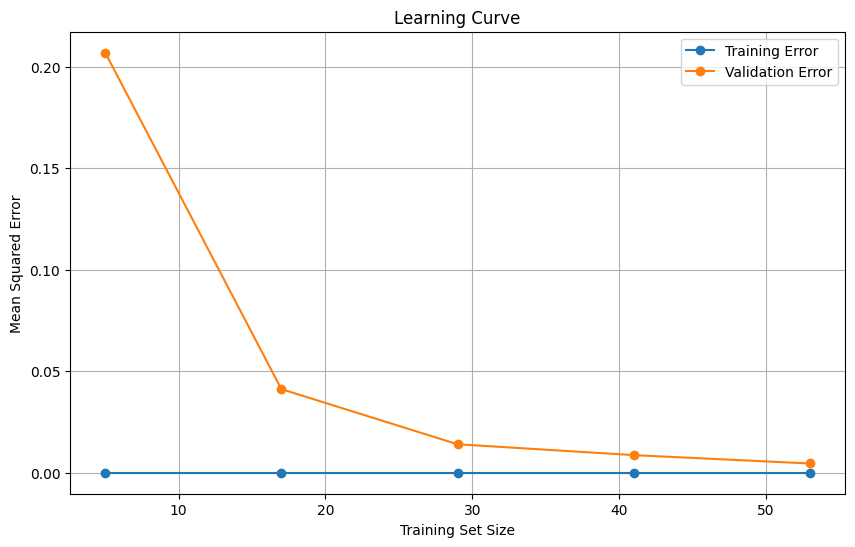

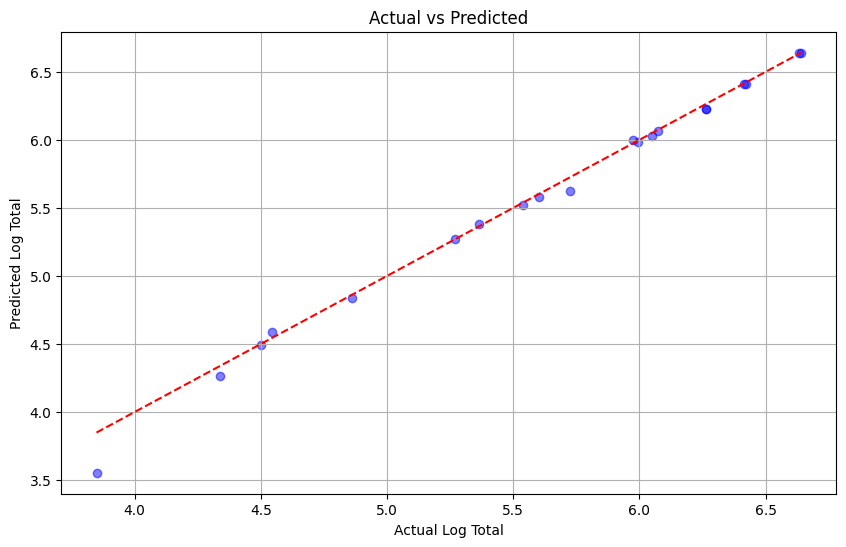

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib  # For saving the model

# Step 1: Load Data
df = pd.read_excel('supermarket dataset.xlsx')
df = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Step 2: Preprocess Data
df['Date'] = pd.to_datetime(df['Date'])
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.drop(columns=['Date', 'Time', 'Invoice ID'], inplace=True)

# Label Encoding
categorical_columns = ['Customer type', 'Gender', 'Payment', 'City', 'Branch', 'Product line']
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature Engineering
df['RevenuePerUnit'] = df['Unit price'] * df['Quantity']
df['LogTotal'] = np.log1p(df['Total'])

# Prepare Features and Target
X = df[['Unit price', 'Quantity', 'Tax 5%', 'Rating', 'RevenuePerUnit']]  # Reduced features
y = df['LogTotal']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Hyperparameter Tuning
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,  # Reduced iterations
    cv=3,       # Reduced folds
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Step 4: Model Evaluation
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 5: Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=3, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='o')
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(best_rf, X_train, y_train)

# Step 6: Save the Model
joblib.dump(best_rf, 'random_forest_model.pkl')  # Save the model as a .pkl file

# Step 7: Plot the Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Log Total")
plt.ylabel("Predicted Log Total")
plt.grid(True)
plt.show()


In [ ]:
# Load the model from the saved file
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)


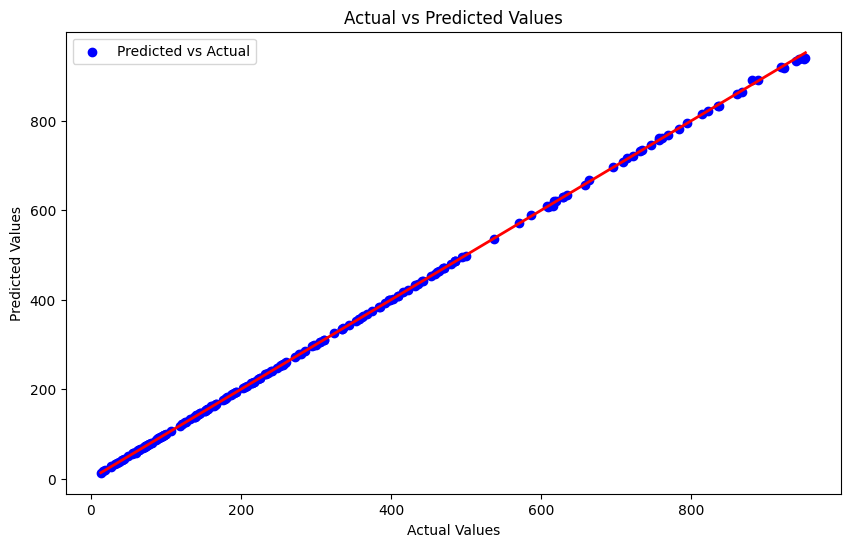

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


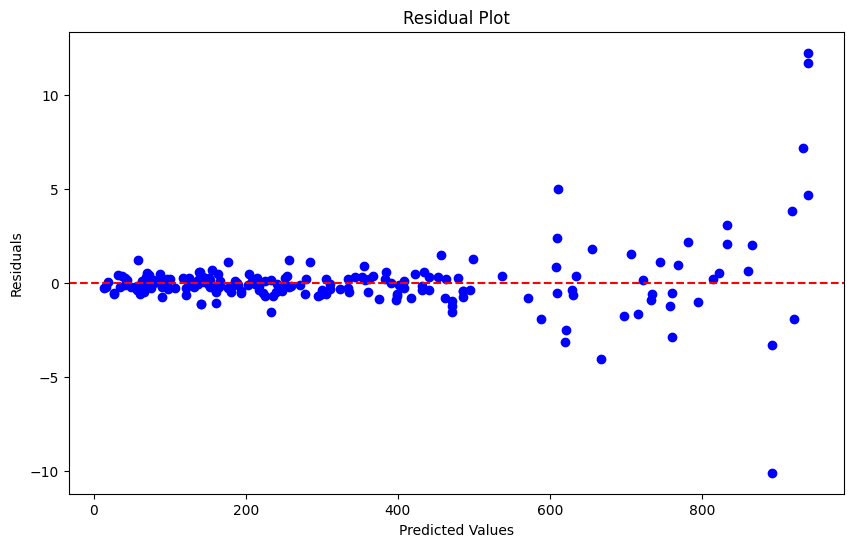

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


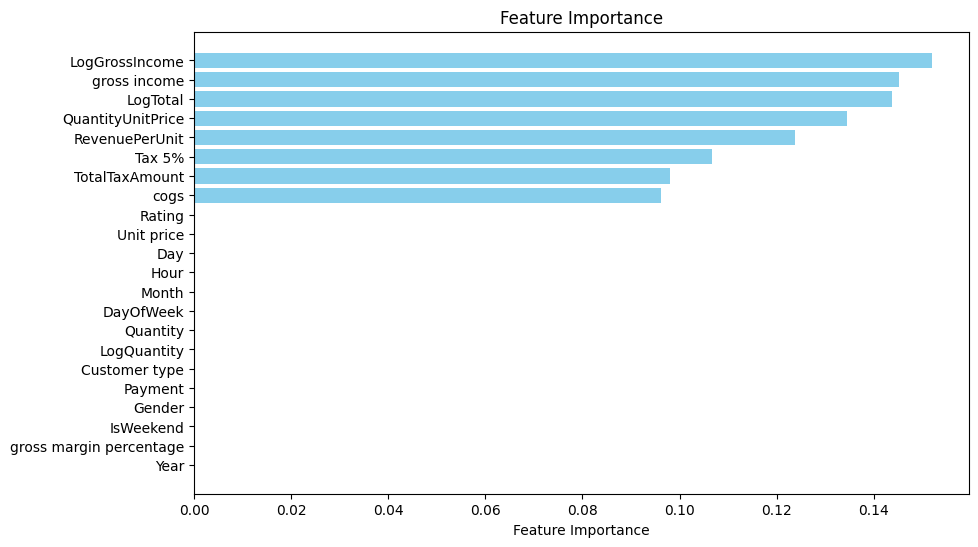

In [ ]:
# Feature importance for Random Forest
importances = rf_regressor.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()


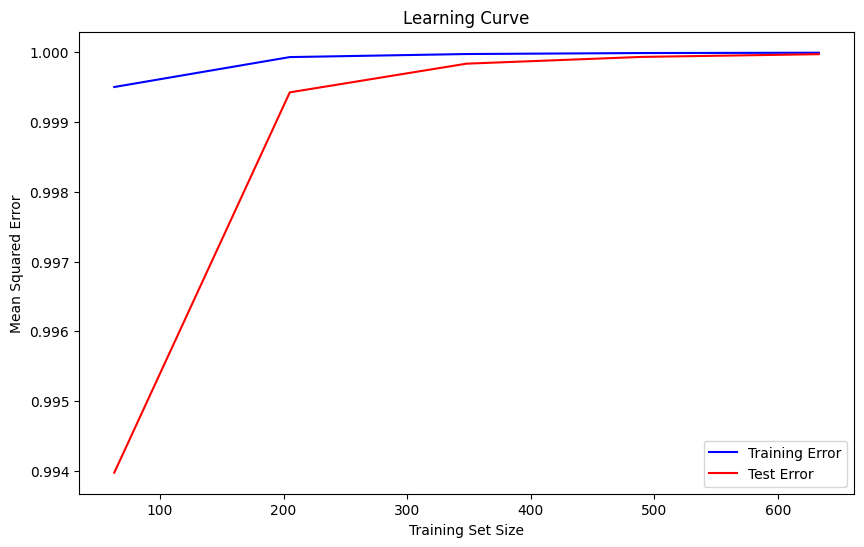

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_regressor, X_train, y_train, cv=5)

# Calculate mean and std deviation for plotting
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


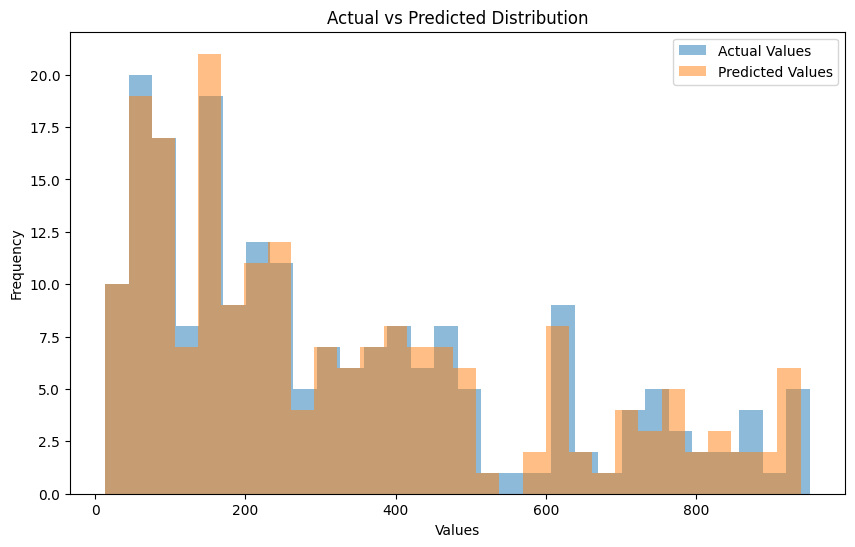

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Values')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()


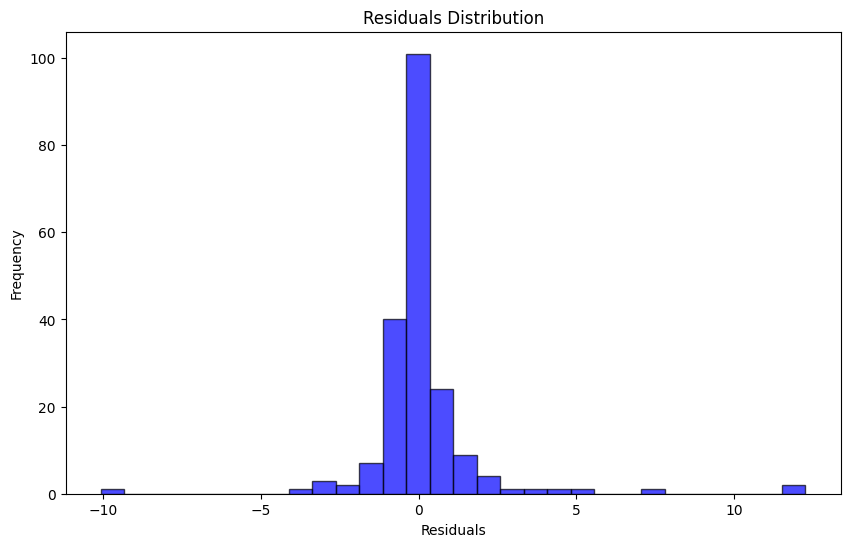

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
